# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))\
medv: median value of owner-occupied homes in $1000s.\
dis: weighted mean of distances to five Boston employment centres.\
We transform both of them into 2D.

_(ii)_ What concept ‘defines’ the plotted line?\
We use linear regression to plot the fitted line.\
which is medv = a*dis + b

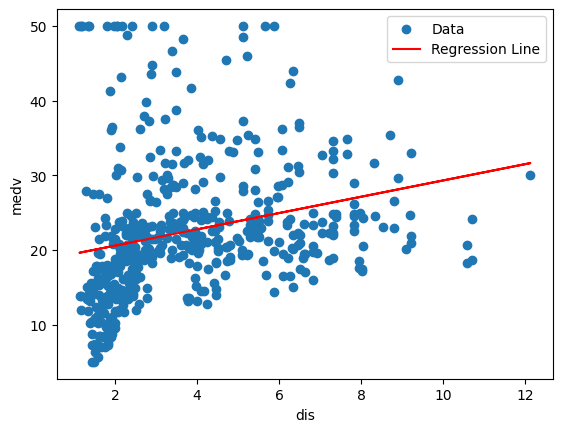

In [4]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?\
medv = slope*dis + intercept \
H0: there is no linear relationship between medv and dis, slope=0. In our context, it's there is no relationship between the median value of owner-occupied homes in $1000s and the weighted mean of distances to five Boston employment centres.\
Ha: there is linear relationship between medv and dis, slope!=0. In our context, it's there exists relationship between the median value of owner-occupied homes in $1000s and the weighted mean of distances to five Boston employment centres.



_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [7]:
# Add your code here
y = medv
X = sm.add_constant(dis)
model = sm.OLS(y, X) # to specify the model
results = model.fit() # to fit the model

summarize(results)

,coef,std err,t,P>|t|
const,18.3901,0.817,22.499,0.0
x1,1.0916,0.188,5.795,0.0


Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  \
B0 = 18.3901\
B1 = 1.0916

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  \
std err for B0 is 0.817\
std err for B1 is 0.188

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  \
97.5% Confidence Intervals for B0: [16.78417945 19.99599722], \
Confidence Intervals for B1: [ 0.72150933  1.4617167 ]


In [6]:
# Your answer here
print(results.summary())

coefficients = results.params
print(coefficients)

# Get confidence intervals for coefficients
conf_intervals = results.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.21e-08
Time:                        15:59:22   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0


Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  \
$R^2$ = 0.062 \
this is small, indicating only 6.2% portion of variability explained by the regression.\
A low $R^2$ value suggests that the model is not a good fit for the data. 

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value). \
F-statistic = 33.58 \
p-value (Prob F-statistic) = 1.21e-08 < 0.05 \
Also, the p-values for t-statistics for both coefficients are less than 0.05.\
Therefore, we reject the null hypothesis and conclude that the model is statistically significant, meaning that we could say the slope of the linear regression model is different from zero, there is linear relationship between the median value of owner-occupied homes in $1000s and the weighted mean of distances to five Boston employment centres.

In [ ]:
# Your answer here
#I answered above.

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [9]:
# Add your code here
# medv = b1*dis + b2*rm + b0
y = medv
X = MS(['dis', 'rm']).fit_transform(Boston)
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-34.6361,2.621,-13.212,0.000
dis,0.4888,0.141,3.459,0.001
rm,8.8014,0.424,20.780,0.000


_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.\
for medv = b1 * dis + b2 * rm + b0\
H0: b1=b2=0. In our context, weighted mean of distances to five Boston employment centres and average number of rooms per dwelling don't have any relationship with the median value of owner-occupied homes. \
Ha: at least one of b1 or b2 is not 0, i.e. at least one of the mean of distances to employement centres and the number of rooms has relationship with the median value of owner-occupied homes.

\\

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?\
R-squared is 0.496, indicates that approximately 49.6% of the variability in medv is explained by the predictors dis and rm. It's a moderate fitting.\
The p value for F-statistic tests (1.84e-75) is extremely small, indicating strong evidence against the null hypothesis. This means that at least one of the predictors is significantly related to medv. \
For the intercept, the value is -34.636 with standard error 2.621, p-value almost 0. \
For b1, the coefficient of dis is 0.489 with standard error 0.141, p-value 0.001. The standard error is small and suggests relatively precise estimates. The p-value is smaller than 0.05, we could reject null hypothesis, the coefficient of predictor dis is not 0.\
For b2, the coefficient of rm is 9.801 with standard error 0.424, p-value almost 0. The standard error is small and suggests relatively precise estimates. The p-value is smaller than 0.05, we could reject null hypothesis, the coefficient of predictor rm is not 0.

Conclusion:\
Both dis and rm are predictive of medv. The coefficients for dis (0.4888) and rm (8.8014) are both statistically significant, i.e. both the mean of distances to employement centres and the number of rooms affects the median value of owner-occupied homes.



_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model? \

The outliers are both mostly at the top, especially at the top-left on the residuals vs. fitted plots of dis.
Outliers can lead to inacurate predictions on new data because the model will be trained based on patterns drawn from the training data. If we remove the outliers, the intercept and the slopes may change, we should carefully review the outliers.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.84e-75
Time:                        17:21:16   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.0

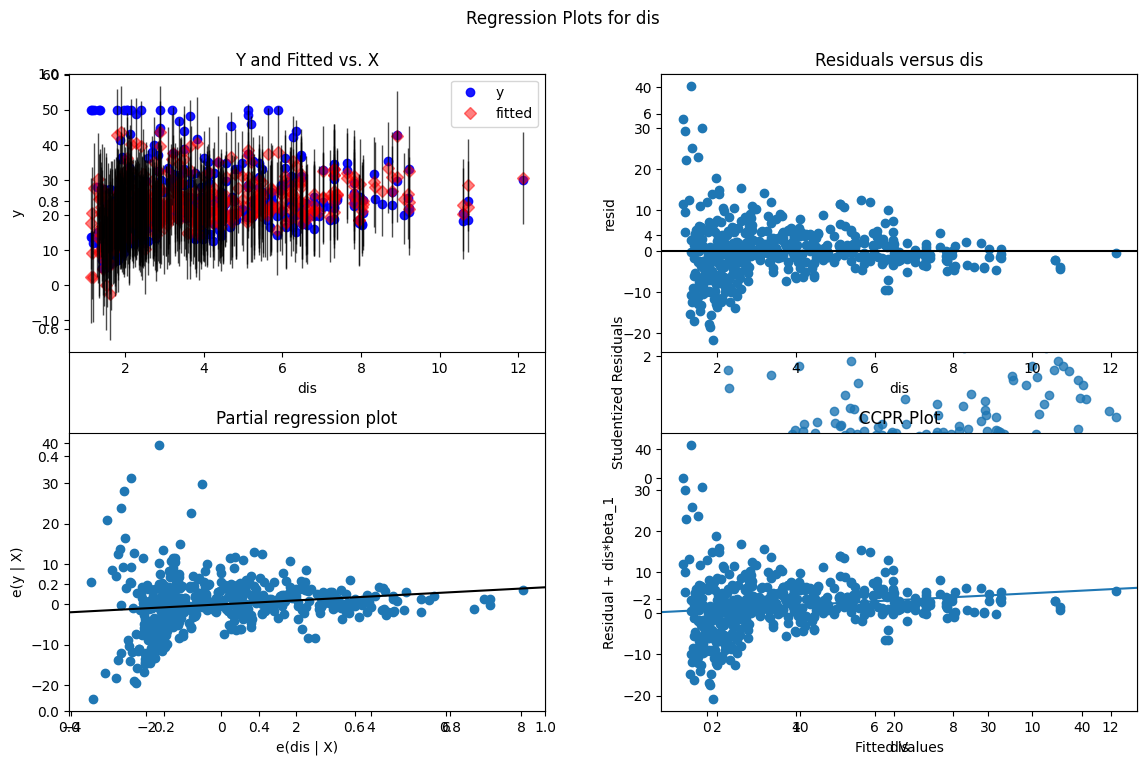

In [21]:
# Add your code here
print(results1.summary())


# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Residuals vs. Fitted Values Plot
sm.graphics.plot_regress_exog(results1, 'dis', fig=fig)

# Studentized Residuals vs. Fitted Values Plot
ax[1].scatter(results1.fittedvalues, results1.get_influence().resid_studentized_internal, alpha=0.8)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Studentized Residuals')

plt.show()


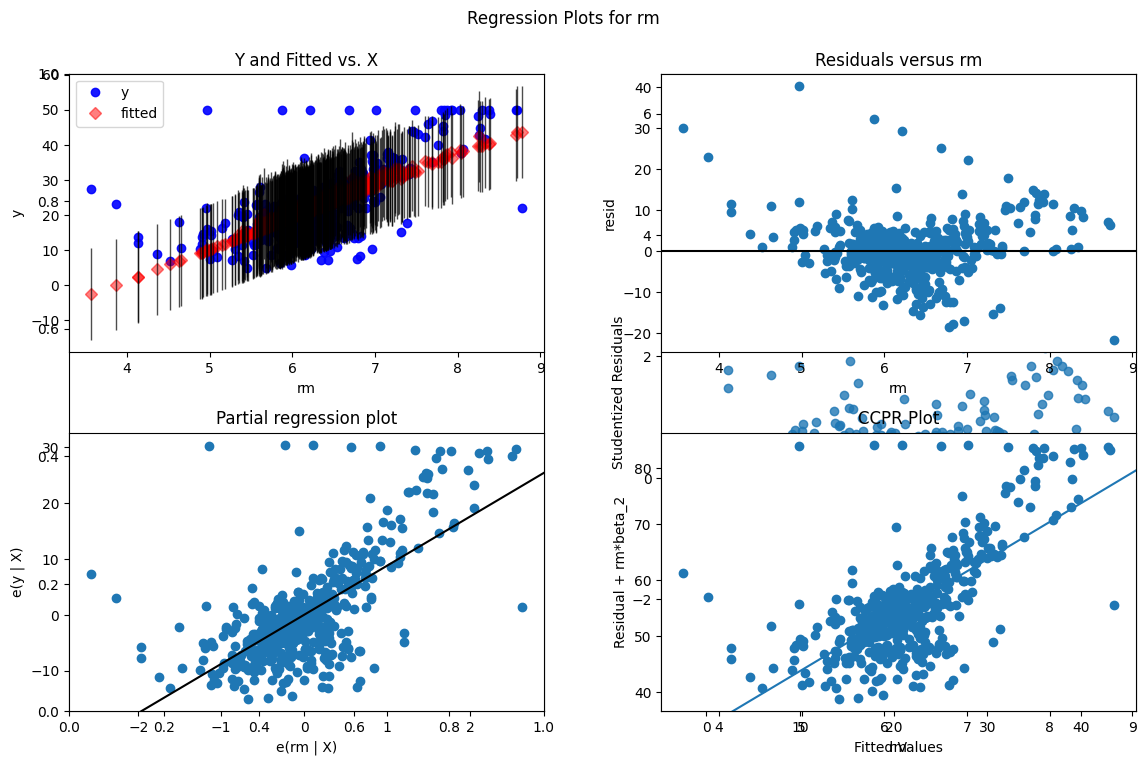

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
sm.graphics.plot_regress_exog(results1, 'rm', fig=fig)
ax[1].scatter(results1.fittedvalues, results1.get_influence().resid_studentized_internal, alpha=0.8)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Studentized Residuals')

plt.show()

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.\
medv = b1 * dis + b2 * rm + b3 * dis * rm + b0 \
H0: b3 = 0 \
Ha: b3!=0, there is an interaction between dis and rm, in our context, the effect of the average number of rooms on median value of owner-occupied homes depends on the distance to employment center, and vice versa.\

R-squared is 0.516, indicates that approximately 51.6% of the variability in medv is explained by the predictors dis and rm. It's a moderate fitting, provides a better fit compared to the simpler models without the interaction term..\
The p-value for F-statistic tests (8.37e-79) is extremely small, indicating strong evidence against the null hypothesis. This means that at least one of the predictors is significantly related to medv. \


For the interaction b3, the coefficient of dis * rm is 0.9855 with standard error 0.212, p-value almost 0. The standard error is small and suggests relatively precise estimates. The p-value is smaller than 0.05, we could reject null hypothesis, indicating that the interaction between dis (distance to employment centers) and rm (average number of rooms) is statistically significant. This means that the effect of rm on medv (median value of owner-occupied homes) depends on the value of dis, and vice versa. \


In the context of the Boston dataset, the positive coefficient for the interaction term suggests that the impact of the average number of rooms (rm) on the median value of homes (medv) increases as the distance to employment centers (dis) increases. This implies that homes with more rooms tend to have higher values, and this effect is stronger for homes located further from employment centers. Conversely, the negative coefficient for dis suggests that, on average, being farther from employment centers reduces home values, but this negative impact is moderated when the homes have more rooms.\





In [13]:
# Add your code here
model = sm.OLS.from_formula('medv ~ dis * rm', data=Boston)
result2 = model.fit()

# Print the summary of the regression
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Fri, 31 May 2024   Prob (F-statistic):           8.37e-79
Time:                        17:08:23   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2533      4.895     -3.116      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
